In [1]:
# Chargement du script raster_tools (un module - et pour l'instant l'unique - du package telenvi)
import os
import raster_tools as rt

---------
telenvi package 3.0.7
---------


In [2]:
# Définition des chemins vers les cibles d'intérêt pour nos tests
path_im_landsat = "/hello/CAM-RANH_2011_10_30_LS8/LT05_L2SP_123052_20111030_20200820_02_T1_SR_B4.TIF"

In [3]:
im_landsat = rt.openGeoRaster(path_im_landsat)

geoim from file LT05_L2SP_123052_20111030_20200820_02_T1_SR_B4.TIF ready


In [4]:
"""
Quand on manipule une image, on parle souvent de 'résolution'. 

Typiquement, quand on regarde une vidéo sur YouTube, sa résolution est exprimée en nombre de pixels
en largeur, ou en hauteur. Plus elle élevée, plus un pixel représente une part petite de l'image co-
mplète. Et donc, plus le niveau de détail est élevé puisque les petites choses sont représentées par
un nombre plus grand de pixels. Pareil quand on cherche à comparer des écrans TV ou d'ordinateur : 
leurs résolutions sont exprimées en nombre de pixels par axe (longueur, largeur). 

En télédétection, on utiliser couramment la 'résolution spatiale' pour comparer différentes images 
ou même différents capteurs. On admet tous, en temps que géomaticien ou télédétecteurs, que la 
'résolution spatiale' d'une image landsat 8 est de 30 mètres, par exemple. 

Et je crois que c'est une erreur et un abus de langage. On ne parle plus de "résolution" comme étant
le nombre de pixels X et le nombre de pixels Y composant notre image, mais comme étant la distance,
dans l'espace "réel" et non "matriciel", qui sépare le bord gauche du bord droit d'un pixel, et leur
bord haut et bas. Voici pourquoi, ici j'utiliserai la notion de "taille du pixel" plutôt que celle de
résolution.  
"""

pass

pixel size : (30.0, -30.0)
origin     : (206985.0, 1383615.0)
bands      : 1
rows       : 6981
columns    : 7941
SCR epsg   : 32649
SCR name   : WGS 84 / UTM zone 49N



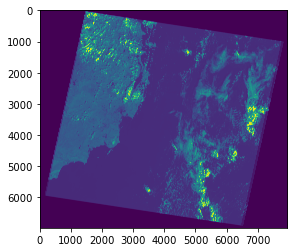

In [5]:
"""
Ceci étant dit, il est très souvent nécessaire de modifier la taille de la portion d'espace représentée
par nos pixels. Ce peut être dans le but de réduire le poids de nos images (des pixels + gros = un poids
 + faible), ou dans le but de rendre deux images comparables pour faire des calculs dessus... 

Du coup, les GeoIm sont dotés d'une fonction de rééchantillonage. Quand on change la taille des pixels, 
on modifie les données transmises par notre image, et du coup c'est mieux de choisir la méthode de
rééchantillonage en étant conscient de ce qu'il se passe au niveau de nos pixels quand on l'applique. 
"""

# Image originale : 
print(im_landsat)
im_landsat.quickVisual()

pixel size : (4000.0, -4000.0)
origin     : (206985.0, 1383615.0)
bands      : 1
rows       : 52
columns    : 60
SCR epsg   : 32649
SCR name   : WGS 84 / UTM zone 49N



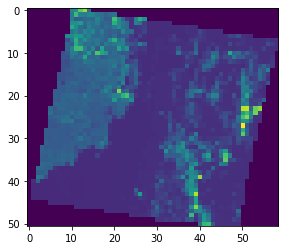

In [6]:
# Le comportement par défaut accepte une taille de pixel X et Y, 
# et utilise la méthode du plus proche voisin.
resample_by_nearest_neighbor = im_landsat.resize(
    xSize = 4000,
    ySize = 4000)

print(resample_by_nearest_neighbor)
resample_by_nearest_neighbor.quickVisual()

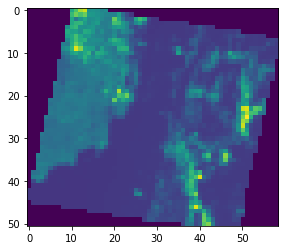

In [8]:
# Il est possible d'utiliser d'autres méthodes comme la moyenne ou l'interpomation bilinéaire...
# la liste des méthodes de rééchantillonage est dispo avec help(rt.GeoIm.resize)
resample_by_average = im_landsat.resize(
    xSize = 4000,
    ySize = 4000,
    method = "average")

resample_by_average.quickVisual()

In [9]:
# On peut ensuite facilement réécrire un nouveau fichier raster avec le résultat du rééchantillonage :
resample_by_average.save("/hello/CAM-RANH_2011_10_30_LS8/resample_by_average.tif")

resample_by_average.tif ok
